# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [8]:
import numpy as np
np.random.seed(42) # For reproducibility
def initialize_network(input_size, hidden_layers, output_size):
    num_nodes_previous = input_size # number of nodes in the previous layer
    
    network = {}  # initialize network an an empty dictionary
    for layer in range(len(hidden_layers) + 1):
        if layer == len(hidden_layers):
            layer_name = 'output' # name last layer in the network output
            num_nodes = output_size
        else:
            layer_name = 'layer{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = hidden_layers[layer]
        
        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node + 1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }
        
        num_nodes_previous = num_nodes # update number of nodes in the previous layer
    
    return network
            
    

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("<Josh + Initialized Network:", network)

<Josh + Initialized Network: {'layer1': {'node_1': {'weights': array([0.37, 0.95, 0.73]), 'bias': array([0.6])}, 'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])}, 'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])}, 'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}}, 'layer2': {'node_1': {'weights': array([0.3 , 0.52, 0.43, 0.29]), 'bias': array([0.61])}, 'node_2': {'weights': array([0.14, 0.29, 0.37, 0.46]), 'bias': array([0.79])}, 'node_3': {'weights': array([0.2 , 0.51, 0.59, 0.05]), 'bias': array([0.61])}}, 'output': {'node_1': {'weights': array([0.17, 0.07, 0.95]), 'bias': array([0.97])}}}


## Step 2: Compute Weighted Sum

In [9]:
def compute_weighted_sum(inputs, weights, biases):
    return np.sum(np.dot(inputs,weights)) + biases
    
    

# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network['layer1']  # First layer
#weighted_sum = compute_weighted_sum(... ,network['layer_1']['node_1']['weights'],,,,,,network['layer_1']['node_1']['bias'])
Z = compute_weighted_sum(inputs, layer['node_1']['weights'], layer['node_1']['bias'])
print("Josh + Weighted Sum:", Z)

Josh + Weighted Sum: [1.048]


## Step 3: Compute Node Activation

In [10]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


def sigmoid_derivative(A):
    return A * (1 - A)


# Compute activation for the weighted sum
A = sigmoid(Z)
print("Josh + Activation:", A)

Josh + Activation: [0.74039066]


## Step 4: Perform Forward Propagation

In [11]:
def forward_propagation(inputs, network):
    """
    Perform forward propagation through the network.
    Arguments:
        inputs: Input array.
        network: Network dictionary with weights and biases.
    Returns:
        activations: List of activations for all layers.
    """
    activations = [inputs]  # Start with the input layer
    for layer in network.values():
        z = []
        a = []
        for node in layer.values():
            z_value = np.dot(activations[-1], node['weights']) + node['bias']
            z.append(z_value)
            a.append(sigmoid(z_value))
        activations.append(np.array(a).flatten())
    return activations



# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("Josh + Final Output:", activations[-1])

[array([[0.5, 0.2, 0.1]]), array([0.74039066, 0.7286927 , 0.80439608, 0.65813632]), array([0.85167349, 0.84623151, 0.83715521]), array([0.87753786])]
Josh + Final Output: [0.87753786]


## Step 5: Backpropagation

In [73]:
def backpropagation(network, activations, y_true):
    delta_output = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])
    
    # Step 2: Backpropagate through each layer
    # Iterate through the layers in reverse order (from output to input)
    for layer_idx in reversed(range(len(network))):  
        layer_name = list(network.keys())[layer_idx]
        current_layer = network[layer_name]
        
        if layer_name == 'output':
            delta = delta_output
        else:
            next_layer_name = list(network.keys())[layer_idx + 1]
            next_layer = network[next_layer_name]
            weight_matrix = np.array([node['weights'] for node in next_layer.values()])
            delta = np.dot(weight_matrix.T, delta.flatten()) * sigmoid_derivative(activations[layer_idx + 1])

    # Return the updated network with modified weights and biases
    return network


# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("Josh + Gradients:", gradients)

delta [[-0.01316041]]

mat: [[0.31795057]
 [0.2170052 ]
 [1.09542849]]

delta [-0.00052859 -0.00037162 -0.00196532]

mat: [[0.3  0.14 0.2 ]
 [0.52 0.29 0.51]
 [0.43 0.37 0.59]
 [0.29 0.46 0.05]]

Josh + Gradients: {'layer1': {'node_1': {'weights': array([0.37, 0.95, 0.73]), 'bias': array([0.6])}, 'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])}, 'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])}, 'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}}, 'layer2': {'node_1': {'weights': array([0.3 , 0.52, 0.43, 0.29]), 'bias': array([0.61])}, 'node_2': {'weights': array([0.14, 0.29, 0.37, 0.46]), 'bias': array([0.79])}, 'node_3': {'weights': array([0.2 , 0.51, 0.59, 0.05]), 'bias': array([0.61])}}, 'output': {'node_1': {'weights': array([0.31795057, 0.2170052 , 1.09542849]), 'bias': array([1.14371747])}}}


## Step 6: Update Weights

In [89]:
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code
    for layer_name in network.keys():  # Iterate over layers in the network
        current_layer = network[layer_name]  # Get current layer
        
        # Ensure gradients exist for this layer
        if layer_name in gradients:
            layer_gradients = gradients[layer_name]
            
            for node_name, node_data in current_layer.items():  # Iterate over nodes in the layer
                if node_name in layer_gradients:
                    # Get weight and bias updates from gradients
                    gradient_weights = layer_gradients[node_name]['weights']  
                    gradient_bias = layer_gradients[node_name]['bias']

                    # Apply the update: W_new = W_old - learning_rate * gradient
                    node_data['weights'] -= learning_rate * gradient_weights  
                    node_data['bias'] -= learning_rate * gradient_bias     

    return network  # Return the updated network
  

# Update weights with a learning rate of 0.1
update_weights(network, gradients, learning_rate=0.1)
print("Josh + Updated Network:", network)

Josh + Updated Network: {'layer1': {'node_1': {'weights': array([0.2997, 0.7695, 0.5913]), 'bias': array([0.486])}, 'node_2': {'weights': array([0.1296, 0.1296, 0.0486]), 'bias': array([0.7047])}, 'node_3': {'weights': array([0.486 , 0.5751, 0.0162]), 'bias': array([0.7857])}, 'node_4': {'weights': array([0.6723, 0.1701, 0.1458]), 'bias': array([0.1458])}}, 'layer2': {'node_1': {'weights': array([0.243 , 0.4212, 0.3483, 0.2349]), 'bias': array([0.4941])}, 'node_2': {'weights': array([0.1134, 0.2349, 0.2997, 0.3726]), 'bias': array([0.6399])}, 'node_3': {'weights': array([0.162 , 0.4131, 0.4779, 0.0405]), 'bias': array([0.4941])}}, 'output': {'node_1': {'weights': array([0.25753996, 0.17577421, 0.88729708]), 'bias': array([0.92641115])}}}


## Step 7: Visualizing Loss Changes

In [90]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


delta [[-0.12499737]]

mat: [[6.84062161e-06]
 [4.66880898e-06]
 [2.35678515e-05]]

delta [-2.13764920e-07 -1.45897206e-07 -7.36479840e-07]

mat: [[6.45441993e-06 3.01206263e-06 4.30294662e-06]
 [1.11876612e-05 6.23927260e-06 1.09725139e-05]
 [9.25133523e-06 7.96045125e-06 1.26936925e-05]
 [6.23927260e-06 9.89677723e-06 1.07573665e-06]]

delta [[-0.12499763]]

mat: [[6.15655945e-06]
 [4.20192808e-06]
 [2.12110664e-05]]

delta [-1.92388834e-07 -1.31307762e-07 -6.62833253e-07]

mat: [[5.80897794e-06 2.71085637e-06 3.87265196e-06]
 [1.00688951e-05 5.61534534e-06 9.87526249e-06]
 [8.32620171e-06 7.16440612e-06 1.14243233e-05]
 [5.61534534e-06 8.90709950e-06 9.68162989e-07]]

delta [[-0.12499787]]

mat: [[5.54090351e-06]
 [3.78173528e-06]
 [1.90899598e-05]]

delta [-1.73150279e-07 -1.18177210e-07 -5.96551059e-07]

mat: [[5.22808014e-06 2.43977073e-06 3.48538676e-06]
 [9.06200558e-06 5.05381080e-06 8.88773624e-06]
 [7.49358154e-06 6.44796551e-06 1.02818909e-05]
 [5.05381080e-06 8.01638955e-0

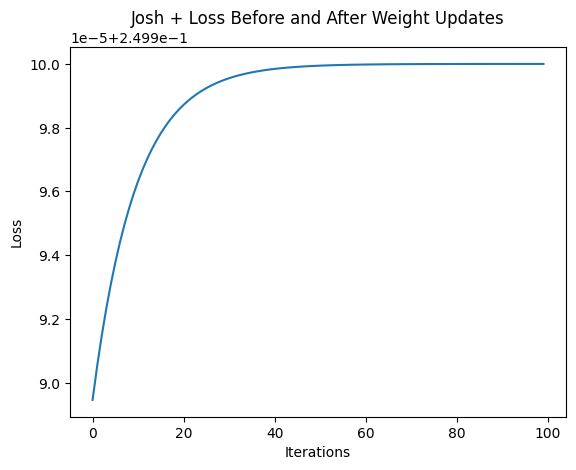

In [94]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(100):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
    activations = forward_propagation(inputs, network)  # Forward pass    
    loss = compute_loss(y_true, activations[-1])  # Loss for the current iteration
    losses.append(loss)  # Append the computed loss to the list

    # gradients = backpropagation function
    # update_weights
    gradients = backpropagation(network, activations, y_true)
    update_weights(network, gradients, learning_rate)
    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Josh + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code